# Classification using Deep Learning based features

In this part of the assignment you will be implementing standard classifcation techiniques on features extracted by deep 
Convolutional Neural Networks. You will then be using these features for classifying different gestures. We will be using the
features extracted by the fc-7 layer of the  Alex-Net Neural Network. The dimensions of each feature will be 4096. 



### Step 1:-  Loading the data 

You have been provided with four files that contain the training and testing features and the training and testing data . These files are :

1) 'deep_test_features.h5':- This file contains all the features that are required for testing the performance of your model.

2) 'deep_training_features.h5':- This file contains all the features that you will be using to train your classifcation model

3) 'deep_training_labels.h5':- This file contains the labels for  all the training features

4) 'deep_test_labels.h5':- This file contains the labels for all the test features

Task :- Your task is to load these files and convert them into suitable numpy arrays. 
The data is in the Hdf5 format. A good tutorial on reading Hdf5 data is available here. By the end of the block you should have four variables. 

X_train :- contains the training Features

Y_train:- Contain the training Labels

X_test:- Contains the test data

Y_test:- Contains the test labels 

You must print the shape of the each of the four variables. The corresponding shapes are :

X_train (3770L, 4096L)

Y_train (3770L,)

X_test (4096L, 1612L)

Y_test (1612L,)

Hint:- use numpy.shape



In [6]:
import h5py    
import numpy as np
# Your code starts here
'''

'''
hf = h5py.File('deep_training_features.h5', 'r')
X_train=hf['trainingFeatures'][:]

hf = h5py.File('deep_training_labels.h5', 'r')
Y_train=hf['trainLabels'][:]

hf = h5py.File('deep_test_features.h5', 'r')
X_test=hf['testFeatures'][:].transpose() # transpose array

hf = h5py.File('deep_test_labels.h5', 'r')
Y_test=hf['testLabels'][:]


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3770, 4096)
(3770,)
(1612, 4096)
(1612,)


#### 2. Support Vector Machine (SVM)

You will be implmenting a linear Support Vector Machine in this Section. Your task is 

1) Train a linear Support Vector Machine on the training data.

2) Test your model to predict the scores of the test data and store it in a variable svm_pred 

Hint:- you might want to look at the library sklearn to see how svm works 





In [7]:
# your code starts here 
from sklearn import svm
clf = svm.LinearSVC()

# Train your SVM 
clf.fit(X_train, Y_train)

# Predict the scores and store them in a variable svm_pred
svm_pred=clf.predict(X_test)

#check values
#print(svm_pred)
#print(Y_test)

##### 2.2 Evaluating SVM 

You will be evluating SVM in this part of your code. You will be three differnt metrics to evaluate SVM. You will make use of svm_pred and Y_test to calculate these measures.

1) Accuracy :- Print the value of the accuracy of your model.

2) Confusion Matrix:- Print the confusion matrix for your data. 

3) ROC characteristic :- You will plot the ROC characteristic of the data. Since ROC characteristics can only be plotted for binary class scenario. You will take into consideration the first class with label 1 as one class . All other classes will be treated as the second class. 

Hint :- Take a look at sklearn.metrics

0.97952853598
[[59  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 32  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0

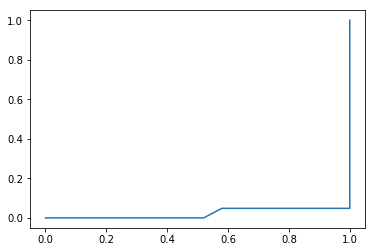

In [8]:
# your code starts here 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Calculate the accuracy
acc = accuracy_score(Y_test, svm_pred)
print(acc)

# Print the confusion matrix
cnf = confusion_matrix(Y_test, svm_pred)
print(cnf)

# Plot the ROC characteristics
fpr, tpr, _ = roc_curve(Y_test, svm_pred, pos_label = 1)

plt.plot(fpr, tpr)
plt.show()


#### 3)  Naive Bayes classifier 

You will be implmenting a Naive Bayes Classifier in this Section. Your task is

1) Train a Naive Bayes Classifier on the training data.

2) Test your model to predict the scores of the test data and store it in a variable nbc_pred

Hint:- sklearn !!! 

In [14]:
# your code starts here 
from sklearn.naive_bayes import GaussianNB # use Gaussian Naive Bayes
nbc = GaussianNB()

# Train your Naive Bayes Classifier 
nbc.fit(X_train, Y_train)

# Predict the scores and store them in a variable nbc_pred
nbc_pred=nbc.predict(X_test)

#check values
#print(nbc_pred)
#print(Y_test)

##### 3.2 Evaluating Naive Bayes Classifier

You will be evluating NBC in this part of your code. You will be three differnt metrics to evaluate NBC. You will make use of 
nbc_pred and Y_test to calculate these measures.

1) Accuracy :- Print the value of the accuracy of your model.

2) Confusion Matrix:- Print the confusion matrix for your data.

3) ROC characteristic :- You will plot the ROC characteristic of the data. Since ROC characteristics can only be plotted for binary class scenario. You will take into consideration the first class with label 1 as one class . All other classes will be treated as the second class.

Hint :-  sklearn.metrics

0.954094292804
[[59  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 57  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3
   0  0]
 [ 0  1 59  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  3  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   0  0]
 [ 0  0  0  0 61  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1 31  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0 58  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  0 60  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  

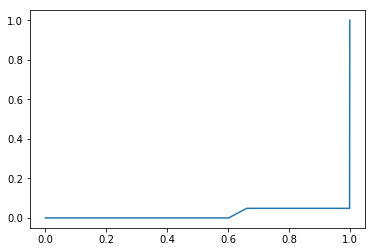

In [15]:
# your code starts here 

# Calculate the accuracy
acc = accuracy_score(Y_test, nbc_pred)
print(acc)

# Print the confusion matrix
cnf = confusion_matrix(Y_test, nbc_pred)
print(cnf)

# Plot the ROC characteristics
fpr, tpr, _ = roc_curve(Y_test, nbc_pred, pos_label = 1)

plt.plot(fpr, tpr)
plt.show()


#### 4) K-Nearest Neighbors

You will be implmenting a Naive Bayes Classifier in this Section. Your task is

1) Train a K-Nerest-Neighbors on the training data.

2) Test your model to predict the scores of the test data and store it in a variable knn_pred

Hint:- sklearn !!!

In [16]:
# your code starts here 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Train the K-Nearest Neighbors classifier
knn.fit(X_train, Y_train)

# Predict the scores and store them in a variable knn_pred
knn_pred=knn.predict(X_test)

#check values
#print(knn_pred)
#print(Y_test)

##### 4.2 Evaluating KNN  

You will be evluating KNN in this part of your code. You will be three differnt metrics to evaluate KNN. You will make use of nbc_pred and Y_test to calculate these measures.

1) Accuracy :- Print the value of the accuracy of your model.

2) Confusion Matrix:- Print the confusion matrix for your data.

3) ROC characteristic :- You will plot the ROC characteristic of the data. Since ROC characteristics can only be plotted for binary class scenario. You will take into consideration the first class with label 1 as one class . All other classes will be treated as the second class.



0.978908188586
[[59  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 61  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 32  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  

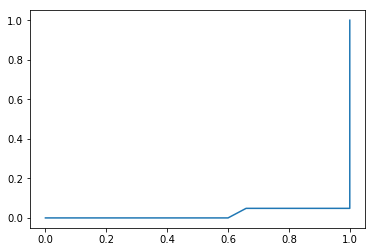

In [17]:
# your code starts here 

# Calculate the accuracy
acc = accuracy_score(Y_test, knn_pred)
print(acc)

# Print the confusion matrix
cnf = confusion_matrix(Y_test, knn_pred)
print(cnf)

# Plot the ROC characteristics
fpr, tpr, _ = roc_curve(Y_test, knn_pred, pos_label = 1)

plt.plot(fpr, tpr)
plt.show()